In [6]:
#Aikasarjaennustaminen - ei trendiä eikä kausivaihtelua
#Yksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa ei ole havaittavaa trendiä tai kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
#Jos ennustetaan pidemmälle kuin seuraavaan aikaleimaan, niin yksinkertainen eksoponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
#Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.
#Huomaa, että tässä esimerkissä yksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä trendi ja kausivaihtelu, jotka malli jättää huomiotta!

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [7]:
df=pd.read_excel('Saapuneet puhelut viikkotasolla.xlsx')
df

,Date,Saapuneet
0,2017-12-10,663
1,2017-12-17,941
2,2017-12-24,658
3,2017-12-31,1206
4,2018-01-07,991
...,...,...
160,2021-01-03,2233
161,2021-01-10,2505
162,2021-01-17,3626
163,2021-01-24,2996


In [8]:
df.index = pd.to_datetime(df['Date'],format="%Y-%m")
df=df.drop('Date',axis=1)
df

,Saapuneet
Date,
2017-12-10,663
2017-12-17,941
2017-12-24,658
2017-12-31,1206
2018-01-07,991
...,...
2021-01-03,2233
2021-01-10,2505
2021-01-17,3626


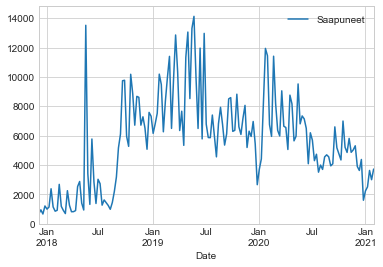

In [9]:
df.plot()

In [10]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#freq-parametrille käytän arvoa 'MS', koska kyseessä oN kuukauden 1. päivä. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', freq='W').fit()

In [11]:
# malli-olion avulla saadaan mallin mukaan simuloidut ennusteet (fittedvalues)
df['Kone-ennuste'] = malli.fittedvalues
df

,Saapuneet,Kone-ennuste
Date,,
2017-12-10,663,881.732403
2017-12-17,941,826.957151
2017-12-24,658,878.169485
2017-12-31,1206,822.936528
2018-01-07,991,959.830853
...,...,...
2021-01-03,2233,3557.209133
2021-01-10,2505,3150.343971
2021-01-17,3626,2959.694643


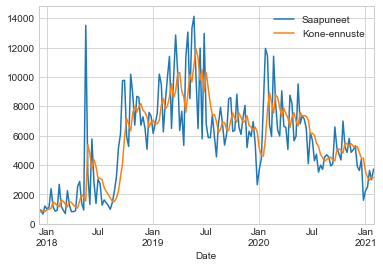

In [12]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [13]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2017-12-10,663,881.732403,-218.732403
2017-12-17,941,826.957151,114.042849
2017-12-24,658,878.169485,-220.169485
2017-12-31,1206,822.936528,383.063472
2018-01-07,991,959.830853,31.169147
...,...,...,...
2021-01-03,2233,3557.209133,-1324.209133
2021-01-10,2505,3150.343971,-645.343971
2021-01-17,3626,2959.694643,666.305357


Text(0, 0.5, 'Ennustevirhe')

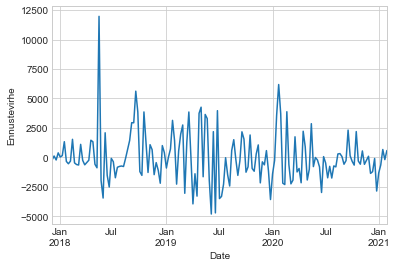

In [14]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

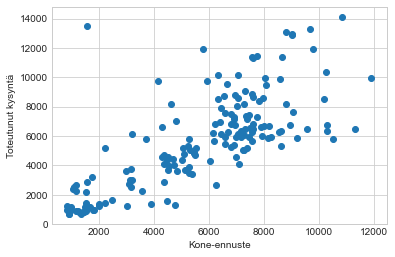

In [15]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Kone-ennuste'], y = df['Saapuneet'])
plt.xlabel('Kone-ennuste')
plt.ylabel('Toteutunut kysyntä')

In [16]:
malli.summary()

Dep. Variable:,endog,No. Observations:,165
Model:,ExponentialSmoothing,SSE,754504078.478
Optimized:,True,AIC,2538.378
Trend:,Additive,BIC,2550.802
Seasonal:,None,AICC,2538.910
Seasonal Periods:,None,Date:,"Thu, 04 Feb 2021"
Box-Cox:,False,Time:,10:39:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3184960,alpha,True
smoothing_slope,0.000000,beta,True


In [18]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2021-01-03,2233,3557.209133,-1324.209133
2021-01-10,2505,3150.343971,-645.343971
2021-01-17,3626,2959.694643,666.305357
2021-01-24,2996,3186.800374,-190.800374
2021-01-31,3719,3140.921361,578.078639


In [19]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-02-07', periods = 6, freq = 'W')

# Ennusteet 6 viikolle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-02-07,3339.927235
2021-02-14,3354.817378
2021-02-21,3369.707521
2021-02-28,3384.597663
2021-03-07,3399.487806
2021-03-14,3414.377949


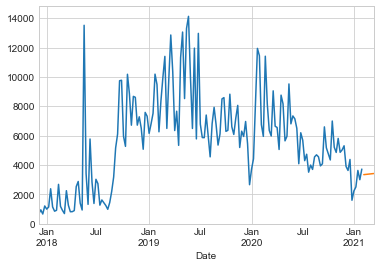

In [20]:
# Viivakaavio havainnoista
#Huomaa, että yksinkertainen eksponentiaalinen tasoitus antaa kaikille tuleville aikaleimoille saman ennusteen.
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [21]:
df.head()

,Saapuneet,Kone-ennuste,Ennustevirhe
Date,,,
2017-12-10,663,881.732403,-218.732403
2017-12-17,941,826.957151,114.042849
2017-12-24,658,878.169485,-220.169485
2017-12-31,1206,822.936528,383.063472
2018-01-07,991,959.830853,31.169147


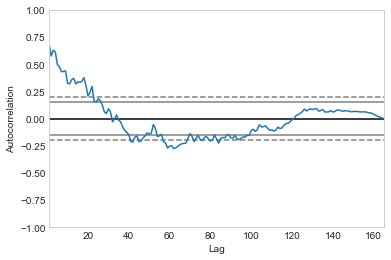

In [23]:
#Aikasarjassa on erotettavissa neljän kuukauden jaksoissa toistuva kausivaihtelu, jota kaksinkertainen 
#eksponentiaalinen tasoitus ei huomioi ennusteessa. Asiaa voin tarkastella myös autokorrelaatioiden avulla. 
#Autokorrelaatio tarkoittaa aikasarjan korrelaatiota viivästetyn aikasarjan kanssa, esimerkiksi aikasarjan 
#korrelaatio viiden kuukauden takaisiin aikasarjan arvoihin. Autokorrelaatio voidaan laskea eri viiveille. 
#Tämän voin tehdä pandas-kirjaston autocorrelation_plot-toiminnolla:
#Vaaka-akselilla on viive (lag) ja pystyakselilla autokorrelaatiokertoimen arvo. Huomaan, että viiveen 0-20 
#kohdalla on suurehko korrelaatio. Tämä viittaa kausivaihtelujaksoon. Kuvion katkoviivat edustavat 
#tilastollisesti merkitsevän korrelaation rajoja. Ennen viivettä 20 kohdalla korrelaatio on katkoviivan 
#yläpuolella ja näin ollen tilastollisesti merkitsevä.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Saapuneet'])

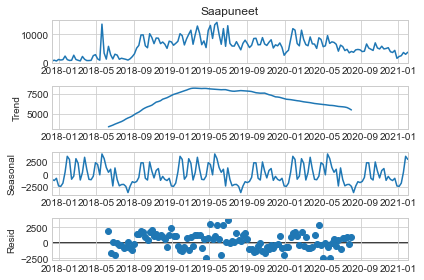

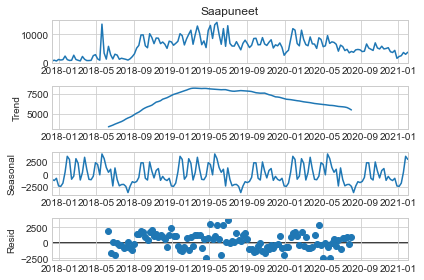

In [24]:
from statsmodels.tsa.api import seasonal_decompose
seasonal_decompose(df['Saapuneet']).plot()